In [0]:
import os
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
savedir = ""
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    savedir = "/content/gdrive/My Drive/colab/"
    try:
        os.mkdir(savedir)
    except FileExistsError:
        print("Directory \"%s\" already exists" % (savedir))

os.listdir(savedir)
os.chdir(savedir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Directory "/content/gdrive/My Drive/colab/" already exists


In [4]:
auto = pd.read_csv("Auto.csv", header=0, na_values='?')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [0]:
auto = auto.dropna(axis=0, how='any')

In [6]:
X = auto['mpg'].values.reshape(-1,1)
y = auto['horsepower'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# intercept
print(reg.intercept_)

# slope
print(reg.coef_)

[192.27523443]
[[-3.7587957]]


In [0]:
y_pred = reg.predict(X_test)

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

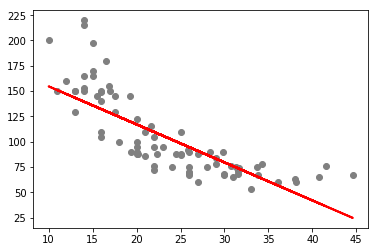

In [10]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [11]:
print('Mean Absolute Error: %.2f' % metrics. mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.58
Mean Squared Error: 595.77
Root Mean Squared Error: 24.41


In [0]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
y = auto['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
reg_m = LinearRegression()
reg_m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
X

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [31]:
coeff_df = pd.DataFrame(reg_m.coef_, auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].columns.values, columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.390347
displacement,0.017436
horsepower,-0.010268
weight,-0.006788
acceleration,0.141379
year,0.741340
origin,1.128293


In [0]:
y_pred = reg_m.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,28.0,25.959768
1,22.3,25.607885
2,12.0,10.612252
3,38.0,32.303522
4,33.8,33.227660
5,19.4,23.483161
6,38.1,34.474615
7,30.0,25.990326
8,20.0,20.507764
9,20.0,27.054445


In [37]:
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2.39
Mean Squared Error: 10.17
Root Mean Squared Error: 3.19
